In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Data Loading**

In [3]:
file_path = '/content/drive/MyDrive/LSMS - Research Project/Exercise Suggetion/gym_members_exercise_tracking.csv'
df = pd.read_csv(file_path)

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

**Data Preprocessing**

In [5]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])
gender_mapping = dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_)))

# Label encode 'Workout_Type'
workout_encoder = LabelEncoder()
df['Workout_Type'] = workout_encoder.fit_transform(df['Workout_Type'])
workout_mapping = dict(zip(workout_encoder.classes_, workout_encoder.transform(workout_encoder.classes_)))

# Print mappings
print("Gender Mapping:", gender_mapping)
print("Workout_Type Mapping:", workout_mapping)

Gender Mapping: {'Female': 0, 'Male': 1}
Workout_Type Mapping: {'Cardio': 0, 'HIIT': 1, 'Strength': 2, 'Yoga': 3}


In [6]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    int64  
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

**Model Training**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming your DataFrame is named df
# Extracting features and target
X = df.drop(columns=['Workout_Type'])  # Features
y = df['Workout_Type']                 # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.2717948717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.52      0.41        46
           1       0.26      0.19      0.22        42
           2       0.21      0.26      0.23        47
           3       0.24      0.15      0.19        60

    accuracy                           0.27       195
   macro avg       0.26      0.28      0.26       195
weighted avg       0.26      0.27      0.26       195



**Model Training Comparison**

In [9]:
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df
# Extracting features and target (for regression tasks, target should be numeric)
X = df.drop(columns=['Workout_Type'])  # Features
y = df['Workout_Type']                 # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of regression models to compare
models = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100),
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Dictionaries to store accuracy and error metrics
r2_scores = {}
mae_scores = {}
mse_scores = {}

# Training, predicting, and evaluating each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Storing the results
    r2_scores[model_name] = abs(r2)  # R^2 (accuracy)
    mae_scores[model_name] = mae     # Mean Absolute Error (loss)
    mse_scores[model_name] = mse     # Mean Squared Error (loss)

# Exporting the Decision Tree Regressor model
joblib.dump(models['Decision Tree Regressor'], 'decision_tree_regressor_model.pkl')

# Displaying the results
print("Model Comparison Results:")
for model_name in models.keys():
    print(f"\n{model_name}:")
    print(f"  R^2 Score: {r2_scores[model_name]}")
    print(f"  Mean Absolute Error: {mae_scores[model_name]}")
    print(f"  Mean Squared Error: {mse_scores[model_name]}")




Model Comparison Results:

Random Forest Regressor:
  R^2 Score: 0.07866940390503818
  Mean Absolute Error: 1.057230769230769
  Mean Squared Error: 1.4267087179487181

Linear Regression:
  R^2 Score: 0.02954247353715811
  Mean Absolute Error: 1.042757011481834
  Mean Squared Error: 1.3617306815010608

Decision Tree Regressor:
  R^2 Score: 0.9734958444347235
  Mean Absolute Error: 1.2666666666666666
  Mean Squared Error: 2.6102564102564103

Support Vector Regressor:
  R^2 Score: 0.07780141633359205
  Mean Absolute Error: 1.0507609604459927
  Mean Squared Error: 1.4255606688515896


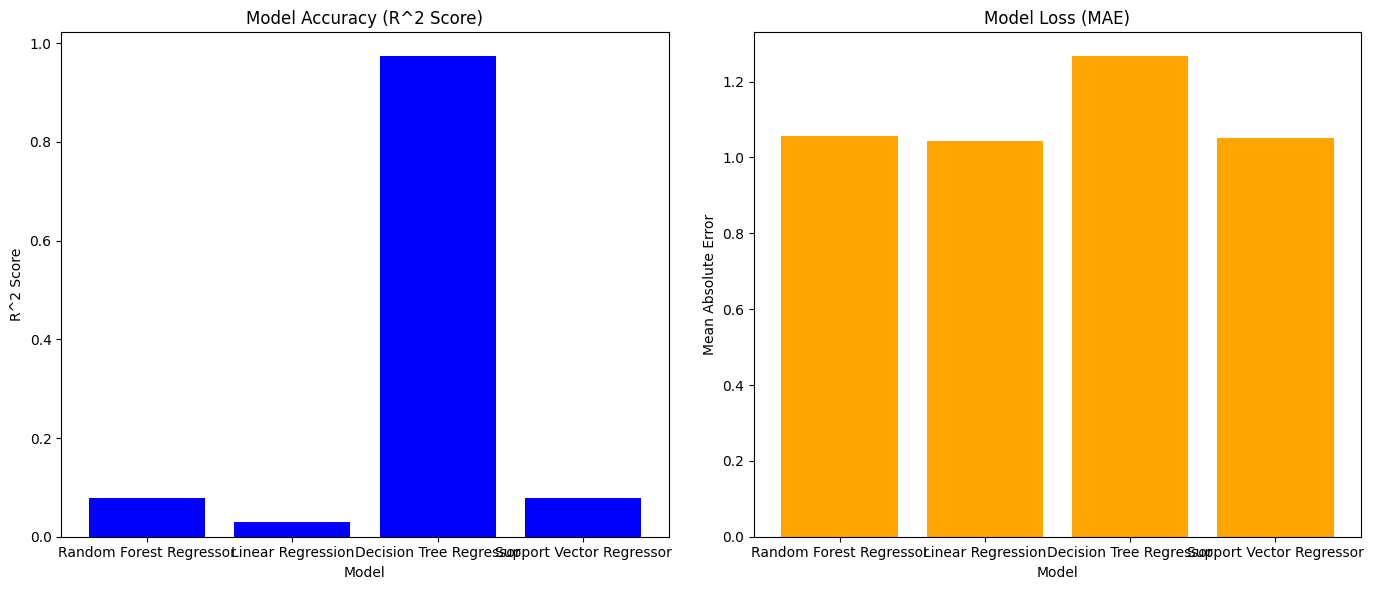

In [10]:
# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting R^2 Scores (Accuracy)
axes[0].bar(r2_scores.keys(), r2_scores.values(), color='blue')
axes[0].set_title('Model Accuracy (R^2 Score)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R^2 Score')

# Plotting Mean Absolute Error (Loss)
axes[1].bar(mae_scores.keys(), mae_scores.values(), color='orange')
axes[1].set_title('Model Loss (MAE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Mean Absolute Error')

# Displaying the charts
plt.tight_layout()
plt.show()

In [11]:
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df
# Extracting features and target (for regression tasks, target should be numeric)
X = df.drop(columns=['Workout_Type'])  # Features
y = df['Workout_Type']                 # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Exporting the model
joblib.dump(model, 'decision_tree_regressor_model.pkl')

# Displaying the results
print("Decision Tree Regressor Model Evaluation:")
print(f"  R^2 Score: {r2}")
print(f"  Mean Absolute Error: {mae}")
print(f"  Mean Squared Error: {mse}")




Decision Tree Regressor Model Evaluation:
  R^2 Score: -0.9734958444347235
  Mean Absolute Error: 1.2666666666666666
  Mean Squared Error: 2.6102564102564103


In [12]:
gender_mapping = {'Female': 0, 'Male': 1}
workout_type_mapping = {'Cardio': 0, 'HIIT': 1, 'Strength': 2, 'Yoga': 3}

def predict_workout_type(age, gender, weight, height, max_bpm, avg_bpm, resting_bpm, session_duration,
                          calories_burned, fat_percentage, water_intake, workout_frequency, experience_level, bmi):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender_mapping.get(gender)],  # Convert gender to numeric
        'Weight (kg)': [weight],
        'Height (m)': [height],
        'Max_BPM': [max_bpm],
        'Avg_BPM': [avg_bpm],
        'Resting_BPM': [resting_bpm],
        'Session_Duration (hours)': [session_duration],
        'Calories_Burned': [calories_burned],
        'Fat_Percentage': [fat_percentage],
        'Water_Intake (liters)': [water_intake],
        'Workout_Frequency (days/week)': [workout_frequency],
        'Experience_Level': [experience_level],
        'BMI': [bmi]
    })

    # Predict the workout type (returns a numeric value)
    workout_type_numeric = model.predict(input_data)

    # Convert numeric result back to workout type label
    workout_type_label = [key for key, value in workout_type_mapping.items() if value == round(workout_type_numeric[0])][0]

    return workout_type_label

# Example usage
predicted_workout_type = predict_workout_type(
    age=25,
    gender='Male',
    weight=70,
    height=1.75,
    max_bpm=190,
    avg_bpm=150,
    resting_bpm=70,
    session_duration=1.5,
    calories_burned=500,
    fat_percentage=15,
    water_intake=2.5,
    workout_frequency=5,
    experience_level=3,
    bmi=22.9
)

print(f"Predicted Workout Type: {predicted_workout_type}")

Predicted Workout Type: HIIT
